# Script for fitting N14 from pulsed odmr

In [12]:
import pylab as pb
import time

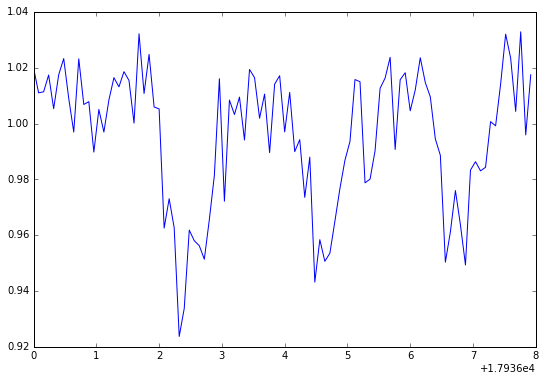

In [13]:
pb.plot(pulsedmeasurement.signal_plot_x, pulsedmeasurement.signal_plot_y)
pb.show()

In [14]:
# multiply the x axis with whatever scaling factor you have coming from the pulsedmeasurement gui
scale = 10**6
freqs = pulsedmeasurement.signal_plot_x * scale
norm_vals = pulsedmeasurement.signal_plot_y

In [15]:
results = fitlogic.make_N14_fit(freqs, norm_vals)

In [16]:
results.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr
l0_amplitude  -0.08147     -inf   -1e-06 0.006558     True     None
l0_center     1.794e+10     -inf      inf 1.97e+04     True     None
l0_contrast     -7.997     -inf      inf   0.6376    False (l0_amplitude/offset)*100
l0_fwhm       6.227e+05     -inf      inf 7.504e+04    False 2*l0_sigma
l0_sigma      3.114e+05    2e+04 7.92e+06 3.752e+04     True     None
l1_amplitude  -0.06564     -inf   -1e-06 0.006416     True     None
l1_center     1.794e+10     -inf      inf 1.97e+04    False l0_center+2150000.0
l1_contrast     -6.443     -inf      inf   0.6266    False (l1_amplitude/offset)*100
l1_fwhm       6.227e+05     -inf      inf        0    False 2*l1_sigma
l1_sigma      3.114e+05    2e+04 7.92e+06 3.752e+04    False l0_sigma
l2_amplitude  -0.05804     -inf   -1e-06 0.006288     True     None
l2_center     1.794e+10     -inf      inf 1.97e+04    False l0_center+4300000.0
l2_contrast     -5.697     -inf      inf   0.6

In [17]:
# values of the center peaks
results.params['l0_center'].value, results.params['l1_center'].value, results.params['l2_center'].value

(17938460894.483505, 17940610894.483505, 17942760894.483505)

In [18]:
results.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr
l0_amplitude  -0.08147     -inf   -1e-06 0.006558     True     None
l0_center     1.794e+10     -inf      inf 1.97e+04     True     None
l0_contrast     -7.997     -inf      inf   0.6376    False (l0_amplitude/offset)*100
l0_fwhm       6.227e+05     -inf      inf 7.504e+04    False 2*l0_sigma
l0_sigma      3.114e+05    2e+04 7.92e+06 3.752e+04     True     None
l1_amplitude  -0.06564     -inf   -1e-06 0.006416     True     None
l1_center     1.794e+10     -inf      inf 1.97e+04    False l0_center+2150000.0
l1_contrast     -6.443     -inf      inf   0.6266    False (l1_amplitude/offset)*100
l1_fwhm       6.227e+05     -inf      inf        0    False 2*l1_sigma
l1_sigma      3.114e+05    2e+04 7.92e+06 3.752e+04    False l0_sigma
l2_amplitude  -0.05804     -inf   -1e-06 0.006288     True     None
l2_center     1.794e+10     -inf      inf 1.97e+04    False l0_center+4300000.0
l2_contrast     -5.697     -inf      inf   0.6

In [19]:
a0 = results.params['offset'] + results.params['l0_amplitude']/(results.params['l0_sigma'] * np.pi)
a1 = results.params['offset'] + results.params['l1_amplitude']/(results.params['l1_sigma'] * np.pi)
a2 = results.params['offset'] + results.params['l2_amplitude']/(results.params['l2_sigma'] * np.pi)

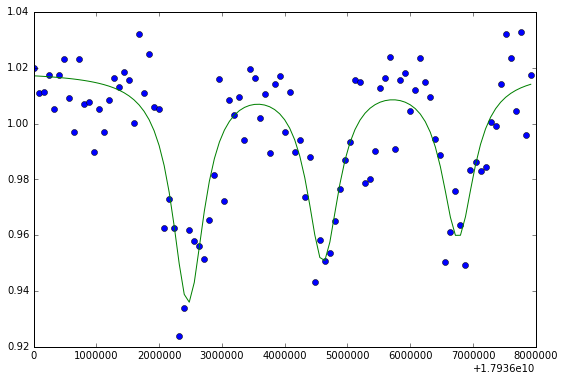

In [20]:
pb.plot(freqs, pulsedmeasurement.signal_plot_y, 'o')
pb.plot(freqs, results.eval())
pb.plot([results.params['l0_center'].value, results.params['l0_center'].value], [a0, results.params['offset'].value], 'r')
pb.plot([results.params['l1_center'].value, results.params['l1_center'].value], [a1, results.params['offset'].value], 'b')
pb.plot([results.params['l2_center'].value, results.params['l2_center'].value], [a2, results.params['offset'].value], 'k')
pb.show()

In [21]:
# calculate sum of contrast 
c0 = (results.params['offset'].value - a0) / results.params['offset']
c1 = (results.params['offset'].value - a1) / results.params['offset']
c2 = (results.params['offset'].value - a2) / results.params['offset']
c0, c1, c2

(8.175138861473973e-08, 6.58635914520187e-08, 5.8242765747766524e-08)

In [11]:
# summed contrasts
c0 + c1 + c2

1.463175467785066e-07